# Test Statistical Differences

This collection of functions takes gaze durations calculated by ??? and tests for differences between indicated variables of interest

In [59]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from random import shuffle 
import re 
import itertools
import random

%matplotlib inline

In [63]:
# Simulate data (for now)

# subject
subjects = list(range(1,21))

subID = list(itertools.chain.from_iterable(itertools.repeat(x, 128) for x in subjects))

# group
groups = [1,2]

group = list(itertools.chain.from_iterable(itertools.repeat(x, 1280) for x in groups))

#markers = dict(zip(network_varZ.columns, shapelist))

# condition
conditions = ["neg", "pos"]

conditions_list = list(itertools.chain.from_iterable(itertools.repeat(x, 64) for x in conditions))

cond = itertools.cycle(conditions_list)

condition = list(next(cond) for x in range(len(subID)))

# stimulus
stimuli = [1,2]

stim_list = list(itertools.chain.from_iterable(itertools.repeat(x, 32) for x in stimuli))

stim = itertools.cycle(stim_list)

stimulus = list(next(stim) for x in range(len(subID)))

# presentation (trial) number
trials = [1, 2, 3, 4]

trial_list = list(itertools.chain.from_iterable(itertools.repeat(x, 4) for x in trials))

tri = itertools.cycle(trial_list)

trial = list(next(tri) for x in range(len(subID)))


# AOI indicator
AOIs = ["left", "right", "off", "total"]

AOI_list = itertools.cycle(AOIs)

AOI = list(next(AOI_list) for x in range(len(subID)))


# duration
duration = [random.random() for _ in range(len(subID))]


In [70]:
# Put simulated data into a dataframe

data = pd.DataFrame({
    'subID': subID,
     'group': group,
     'condition': condition,
     'stimulus': stimulus,
     'trial': trial,
     'aoi': AOI,
     'duration': duration
    })

In [65]:
data

,aoi,condition,duration,group,stimulus,subID,trial
0,left,neg,0.213625,1,1,1,1
1,right,neg,0.145553,1,1,1,1
2,off,neg,0.789894,1,1,1,1
3,total,neg,0.124962,1,1,1,1
4,left,neg,0.154783,1,1,1,2
5,right,neg,0.251054,1,1,1,2
6,off,neg,0.540567,1,1,1,2
7,total,neg,0.018884,1,1,1,2
8,left,neg,0.747744,1,1,1,3
9,right,neg,0.756201,1,1,1,3


right mean: 0.490561
left mean: 0.475560
true difference: 0.015001

pvalue = 0.370000


0.37

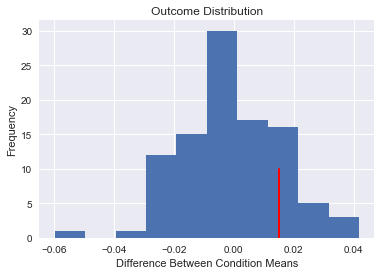

In [78]:
permutation_test(data, 'aoi', 'duration', 'right', 'left', 100, hist = 'yes')

In [72]:
def permutation_test(data, indicator_variable, value_variable, label_1, label_2, n_permutation, hist = 'yes'):
    
    # Pull out the values and labels
    values1 = data[value_variable][data[indicator_variable]==label_1]
    values2 = data[value_variable][data[indicator_variable]==label_2]

    labels1 = data[indicator_variable][data[indicator_variable]==label_1]
    labels2 = data[indicator_variable][data[indicator_variable]==label_2]
    
    # Create a single list of values
    valueslist = values1.tolist() + values2.tolist()
    
    # Find the actual difference value
    truemean1 = np.mean(values1.tolist())
    truemean2 = np.mean(values2.tolist())
    
    truediff = truemean1 - truemean2
    
    # Create the data structure to store the permutation outcomes
    difflist = []
    
    # Create the null distribution by shuffling condition labels
    for n in range(n_permutation):
        
        # Concatenate the group labels into a single list
        labelslist = labels1.tolist() + labels2.tolist()
        
        # shuffle the label list
        shuffle(labelslist)
        
        # pull out the values that now randomly match to the shuffled labels
        outcome1 = [i for i,j in zip(valueslist,labelslist) if j == label_1]

        outcome2 = [i for i,j in zip(valueslist,labelslist) if j == label_2]

        
        # take the means of those shuffled conditions
        mean1 = np.mean(outcome1)

        mean2 = np.mean(outcome2)
        
        # subtract the means to get a difference
        diff = mean1 - mean2
        
        # store the value
        difflist.append(diff)
        
    
    # calculate a p-value of the actual difference
    pvalue = sum(abs(i) >= abs(truediff) for i in difflist)/n_permutation
    
    # print basic information about the data and outcome
    print('%s mean: %f\n%s mean: %f\ntrue difference: %f\n\npvalue = %f' 
          % (label_1, truemean1, label_2, truemean2, truediff, pvalue))
    
    if hist == 'yes':

        # make a histogram of the outcomes
        plt.hist(difflist)
        plt.plot([truediff, truediff], [0, n_permutation/10], 'k-', lw=2, color='red')
        plt.title('Outcome Distribution')
        plt.xlabel('Difference Between Condition Means')
        plt.ylabel('Frequency')
        
    elif hist == 'no':
        return
    else:
        raise Exception("Error: please specify hist as yes or no")
    
    # return the pvalue so that it can be used later (even though this isn't pretty)
    return(pvalue)